In [1]:

import numpy as np
import matplotlib.pyplot as plt
# market data from Yahoo! Finance's API
import yfinance as yf


In [2]:
# in this function we calculate the data
def bollinger_bands(data, window_size = 30):
    """
    Function to calculate Bollinger Bands for a given dataset.

    Parameters:
    - data: DataFrame containing stock data that contains 'Close' column.
    - window_size: Size of the window for calculating the moving average and STD.

    Returns:
    - DataFrame with 'upperBand' and 'lowerBand' columns added, representing the upper and lower Bollinger Bands.
    """
    simple_moving_avarage = data['Close'].rolling(window = window_size, ).mean()
    rolling_std = data['Close'].rolling(window = window_size).std()
    
    # add the two columns 
    data['upperBand'] = simple_moving_avarage + (2* rolling_std)
    data['lowerBand'] = simple_moving_avarage - (2* rolling_std)
    
    return data
    

In [3]:
# create
def calculate_RSI(data, window = 10):
    """
    Function to calculate the Relative Strength Index (RSI) for agiven dataset.
    
    Parameters:
    - data: DataFrame containing stock data that contains 'Close' column.
    - window: Size of the window for calculating average gain and average loss.
    
    Returns:
    - DataFrame with 'RSI', 'overBought', and 'overSold' columns added, representing the RSI values
      and overbought/oversold thresholds respectively.
    """
    # calculate the change of price 
    delta = data['Close'].diff()
    
    # seperate the gain and loss in the data
    gain = delta.where(delta > 0, 0)
    loss = delta.where(delta < 0, 0)
    
    # calculate RS
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    RS = avg_gain / avg_loss
    
    # calculate the RSI
    RSI = 100 - (100/1+RS)
    data['RSI'] = RSI
    data['overBought'] = 70
    data['overSold'] = 30
    return data
    
    

In [4]:
def strategy(data):
    """
    Trading strategy based on Bollinger Bands and RSI.

    Parameters:
    - data: DataFrame containing stock data with 'Close', 'lowerBand', 'RSI', 'overSold', 'upperBand', 'overBought'.

    Returns:
    - buy_price: List of buy prices. NaN is appended if no buy signal is generated.
    - sell_price: List of sell prices. NaN is appended if no sell signal is generated.
    """
    position = 0 
    buy_price = []  
    sell_price = []  

    for i in range(len(data)):
        
        # Buy signal conditions: Close price below lower Bollinger Band and RSI below oversold threshold
        if data['Close'][i] < data['lowerBand'][i] and data['RSI'][i] < data['overSold'][i] and position == 0:
            position = 1 
            buy_price.append(data['Close'][i])  
            sell_price.append(np.nan) 
            
        # Sell signal conditions: Close price above upper Bollinger Band and RSI above overbought threshold
        elif data['Close'][i] > data['upperBand'][i] and data['RSI'][i] > data['overBought'][i] and position == 1:
            position = 0 
            sell_price.append(data['Close'][i])  
            buy_price.append(np.nan)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)

    return buy_price, sell_price


In [5]:
def fetch_stock_data():
    """
    Function to fetch stock data from Yahoo Finance API.

    Returns:
    - data: DataFrame containing historical stock data for AAPL with a 1-hour timeframe.
    """
    # Fetch AAPL stock data with a 1-hour timeframe by using Yahoo Finance API
    aapl = yf.Ticker("AAPL")
    
    # Adjust the period and interval as we needed
    data = aapl.history(period="60d", interval="1h")
    
    return data


In [6]:
data = fetch_stock_data()

In [8]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-02-13 09:30:00-05:00,185.770004,186.210007,184.179993,185.470795,13054284,0.0,0.0
2024-02-13 10:30:00-05:00,185.479904,186.119904,185.360001,185.610001,5752805,0.0,0.0
2024-02-13 11:30:00-05:00,185.595001,185.739395,185.251602,185.475006,3585593,0.0,0.0
2024-02-13 12:30:00-05:00,185.479996,185.770004,185.110001,185.294998,3022354,0.0,0.0
2024-02-13 13:30:00-05:00,185.289993,185.380005,184.190002,184.285004,4531260,0.0,0.0


In [9]:
data = bollinger_bands(data)

In [10]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,upperBand,lowerBand
Datetime,,,,,,,,,
2024-02-13 09:30:00-05:00,185.770004,186.210007,184.179993,185.470795,13054284,0.0,0.0,NaN,NaN
2024-02-13 10:30:00-05:00,185.479904,186.119904,185.360001,185.610001,5752805,0.0,0.0,NaN,NaN
2024-02-13 11:30:00-05:00,185.595001,185.739395,185.251602,185.475006,3585593,0.0,0.0,NaN,NaN
2024-02-13 12:30:00-05:00,185.479996,185.770004,185.110001,185.294998,3022354,0.0,0.0,NaN,NaN
2024-02-13 13:30:00-05:00,185.289993,185.380005,184.190002,184.285004,4531260,0.0,0.0,NaN,NaN


In [11]:
data = calculate_RSI(data)


In [12]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,upperBand,lowerBand,RSI,overBought,overSold
Datetime,,,,,,,,,,,,
2024-02-13 09:30:00-05:00,185.770004,186.210007,184.179993,185.470795,13054284,0.0,0.0,NaN,NaN,NaN,70,30
2024-02-13 10:30:00-05:00,185.479904,186.119904,185.360001,185.610001,5752805,0.0,0.0,NaN,NaN,NaN,70,30
2024-02-13 11:30:00-05:00,185.595001,185.739395,185.251602,185.475006,3585593,0.0,0.0,NaN,NaN,NaN,70,30
2024-02-13 12:30:00-05:00,185.479996,185.770004,185.110001,185.294998,3022354,0.0,0.0,NaN,NaN,NaN,70,30
2024-02-13 13:30:00-05:00,185.289993,185.380005,184.190002,184.285004,4531260,0.0,0.0,NaN,NaN,NaN,70,30


In [13]:
buy_price, sell_price = strategy(data)

In [14]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,upperBand,lowerBand,RSI,overBought,overSold
Datetime,,,,,,,,,,,,
2024-02-13 09:30:00-05:00,185.770004,186.210007,184.179993,185.470795,13054284,0.0,0.0,NaN,NaN,NaN,70,30
2024-02-13 10:30:00-05:00,185.479904,186.119904,185.360001,185.610001,5752805,0.0,0.0,NaN,NaN,NaN,70,30
2024-02-13 11:30:00-05:00,185.595001,185.739395,185.251602,185.475006,3585593,0.0,0.0,NaN,NaN,NaN,70,30
2024-02-13 12:30:00-05:00,185.479996,185.770004,185.110001,185.294998,3022354,0.0,0.0,NaN,NaN,NaN,70,30
2024-02-13 13:30:00-05:00,185.289993,185.380005,184.190002,184.285004,4531260,0.0,0.0,NaN,NaN,NaN,70,30


In [ ]:
data['buy'] = buy_price
data['sell'] = sell_price


In [ ]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,upperBand,lowerBand,RSI,overBought,overSold,buy,sell
Datetime,,,,,,,,,,,,,,
2024-02-13 09:30:00-05:00,185.770004,186.210007,184.179993,185.470795,13054284,0.0,0.0,NaN,NaN,NaN,70,30,NaN,NaN
2024-02-13 10:30:00-05:00,185.479904,186.119904,185.360001,185.610001,5752805,0.0,0.0,NaN,NaN,NaN,70,30,NaN,NaN
2024-02-13 11:30:00-05:00,185.595001,185.739395,185.251602,185.475006,3585593,0.0,0.0,NaN,NaN,NaN,70,30,NaN,NaN
2024-02-13 12:30:00-05:00,185.479996,185.770004,185.110001,185.294998,3022354,0.0,0.0,NaN,NaN,NaN,70,30,NaN,NaN
2024-02-13 13:30:00-05:00,185.289993,185.380005,184.190002,184.285004,4531260,0.0,0.0,NaN,NaN,NaN,70,30,NaN,NaN


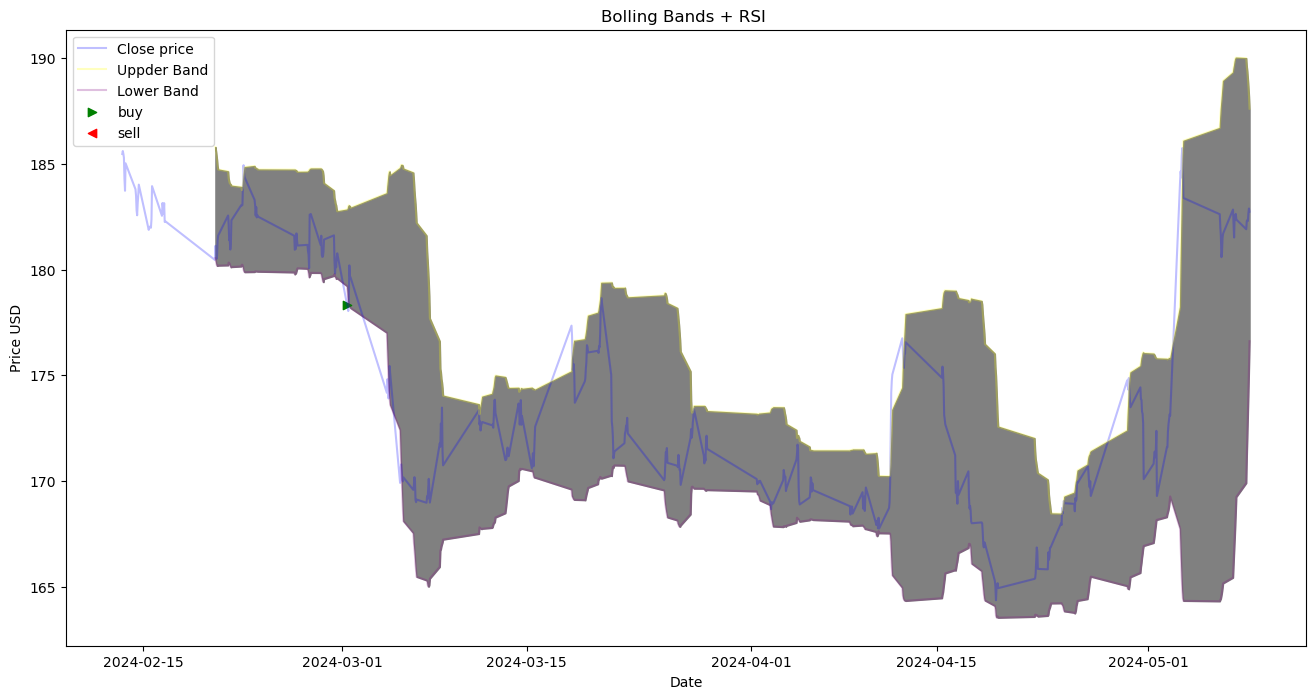

In [ ]:
# plotting
fix, ax = plt.subplots(figsize=(16,8))
plt.title("Bolling Bands + RSI ")
plt.ylabel("Price USD")
plt.xlabel("Date")

ax.plot(data['Close'], label='Close price', alpha=.25, color='blue')
ax.plot(data['upperBand'], label='Uppder Band', alpha=.25, color='yellow')
ax.plot(data['lowerBand'], label='Lower Band', alpha=.25, color='purple')

ax.fill_between(data.index, data['upperBand'], data['lowerBand'], color='grey')
ax.scatter(data.index, data['buy'], label="buy", alpha=1, marker='>', color='green')
ax.scatter(data.index, data['sell'], label="sell", alpha=1, marker="<", color='red')

plt.legend()
plt.show()